In [1]:
from sklearn.model_selection import train_test_split, cross_validate
from utils import reduced_classes_with_other

from sklearn import tree
import numpy as np

from tqdm import tqdm

In [2]:
X_train, X_test, y_train, y_test = reduced_classes_with_other()

## Cost Complexity Pruned tree

In [ ]:
dtree = tree.DecisionTreeClassifier(random_state=0)
dtree = dtree.fit(X_train, y_train)

path = dtree.cost_complexity_pruning_path(X_train, y_train)
path.ccp_alphas


array([0.00000000e+00, 1.19047619e-05, 1.19047619e-05, ...,
       3.69979013e-02, 5.25993498e-02, 5.72568382e-02])

In [27]:
path.ccp_alphas.shape

(5077,)

In [17]:
alphas_to_use = path.ccp_alphas[1:-1:50]

In [18]:
alphas_to_use.shape

(102,)

In [19]:
train_scores = []
val_scores = []
for ccp_alpha_i in tqdm(alphas_to_use):
    dtree = tree.DecisionTreeClassifier(ccp_alpha = ccp_alpha_i, random_state=0)
    scores = cross_validate(dtree, X_train, y_train, cv=5, return_train_score=True, n_jobs=-1)
    train_scores.append(scores['train_score'].mean())
    val_scores.append(scores['test_score'].mean())

100%|██████████| 102/102 [11:51<00:00,  6.98s/it]


In [8]:
import matplotlib.pyplot as plt

/var/folders/9f/0qkxn3mj7zd4n0_7vpzl6jt40000gn/T/ipykernel_45659/2412922049.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(alphas_to_use,  train_scores, label='Training', cmap='Blues')
/var/folders/9f/0qkxn3mj7zd4n0_7vpzl6jt40000gn/T/ipykernel_45659/2412922049.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(alphas_to_use,  val_scores, label='Validation', cmap='Blues')


Text(0, 0.5, 'accuracy')

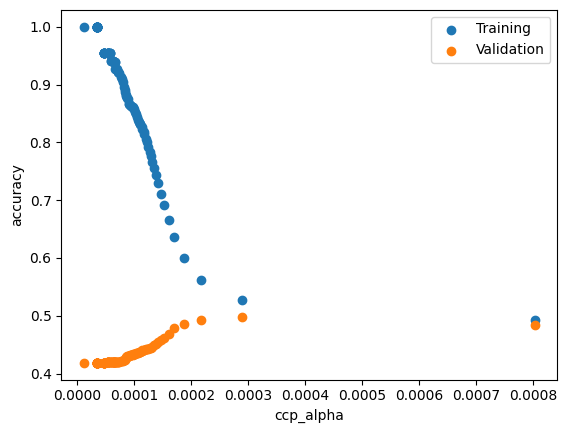

In [ ]:
plt.scatter(alphas_to_use,  train_scores, label='Training', cmap='Blues')
plt.scatter(alphas_to_use,  val_scores, label='Validation', cmap='Blues')
plt.legend()
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')


In [21]:
best_alpha = alphas_to_use[1:-1][np.argmax(val_scores[1:-1])]
best_alpha

np.float64(0.0002898990381896248)

In [22]:
dtree = tree.DecisionTreeClassifier(ccp_alpha = best_alpha, random_state=0, min_samples_leaf=0.02)
dtree = dtree.fit(X_train, y_train)

In [23]:
dtree.score(X_test, y_test)

0.4522719565954561

<Axes: xlabel='subreddit'>

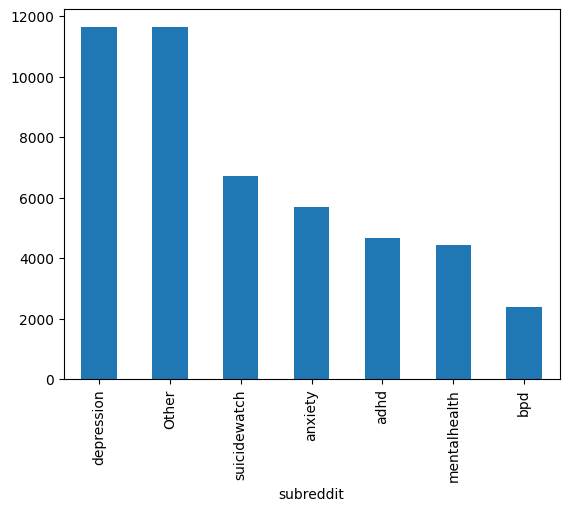

In [24]:
y_test.value_counts().plot(kind='bar')